In [1]:
from multiprocessing import Pool

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pmdarima.arima import auto_arima

In [2]:
population = np.load("ntt_mss_2019.npy")
areas = np.load("ntt_mss_2019_areas.npy")

In [ ]:
# 青葉山駅 574036064
# 川内駅 574036181
# 東京駅 533946113
# 歌舞伎町 533945363
# 渋谷駅 533935961

aobayama = np.where(areas == 574036064)[0][0]
tokyo = np.where(areas == 533946113)[0][0]
kabukicho = np.where(areas == 533945363)[0][0]
shibuya = np.where(areas == 533935961)[0][0]

ts = pd.Series(data=population[:, tokyo],
               index=pd.date_range(start="2019-01-01", end="2020-01-01", inclusive="left", freq="H")) 
ts = ts.loc[pd.date_range(start="2019-4-1", end="2019-5-31", freq="H")]

model = auto_arima(
        ts,
        start_p=1,
        start_q=1,
        test="adf",
        max_p=3,
        max_q=3,
        m=24,
        start_P=0,
        seasonal=True,
        d=None,
        D=1,
        trace=False,
        error_action="ignore",
        suppress_warnings=True,
        stepwise=True,
    )

In [35]:
model.arima_res_.save("model.pkl")

In [36]:
!ls -lah

total 54G
drwxrwxr-x.   4 keichi default  68K Dec 18 23:39 .
drwxr-xr-x.   5 keichi default 4.0K Dec 12 18:25 ..
drwxrwxr-x. 367 keichi default  12K Dec  4 00:53 2019
-rw-r--r--.   1 keichi default 151K Dec 18 23:39 arima.ipynb
-rw-r--r--.   1 keichi default  705 Dec  8 21:14 arima.py
drwxr-xr-x.   2 keichi default 4.0K Dec 18 21:44 .ipynb_checkpoints
-rw-r--r--.   1 keichi default 535M Dec 18 23:47 model.pkl
-rw-r--r--.   1 keichi default 5.6M Dec  7 03:00 ntt_mss_2019_areas.npy
-rw-r--r--.   1 keichi default  48G Dec  7 03:00 ntt_mss_2019.npy
-rw-r--r--.   1 keichi default 6.2G Dec 18 19:24 ntt_mss_2019.zip
-rw-r--r--.   1 keichi default 3.5M Dec 18 22:38 postprocess2.ipynb
-rw-r--r--.   1 keichi default 744K Dec 18 10:53 postprocess.ipynb
-rw-r--r--.   1 keichi default 1.1K Dec  6 23:49 preprocess.py


In [37]:
model.order, model.seasonal_order, model.method

((1, 0, 2), (1, 0, 2, 24), 'lbfgs')

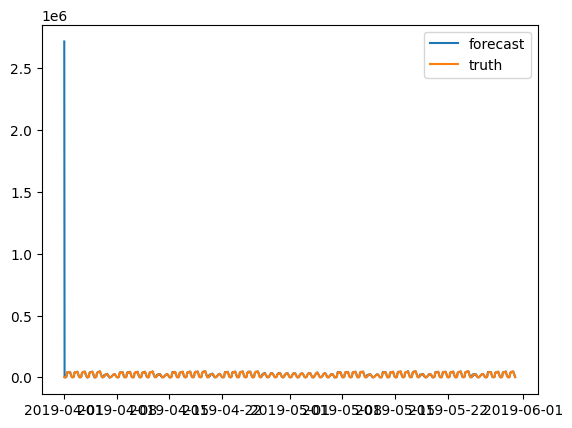

In [38]:
plt.plot(model.predict_in_sample(), label="forecast")
plt.plot(ts, label="truth")
plt.legend();